# <div style="color:blue;display:inline-block;border-radius:5px;background-image: url(https://i.postimg.cc/mDd6S6Mz/imoji-jcdumlao.png);font-family:Nexa;overflow:hidden"><p style="padding:15px;color:blue;overflow:hidden;font-size:95%;letter-spacing:0.5px;margin:0"><b> </b> Import Modules</p></div>



In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
from transformers import AutoModelForSequenceClassification
from transformers import AutoTokenizer, AutoConfig
from scipy.special import softmax



In [2]:
import warnings
warnings.filterwarnings('ignore')

import math

rc = {
    "axes.facecolor": "#f9f4f4",
    "figure.facecolor": "#f9f4f4",
    "axes.edgecolor": "#000000",
    "grid.color": "#EBEBE7",
    "font.family": "serif",
    "axes.labelcolor": "#000000",
    "xtick.color": "#000000",
    "ytick.color": "#000000",
    "grid.alpha": 0.4
}

sns.set(rc=rc)

from colorama import Style, Fore
red = Style.BRIGHT + Fore.RED
blu = Style.BRIGHT + Fore.BLUE
mgt = Style.BRIGHT + Fore.MAGENTA
gld = Style.BRIGHT + Fore.YELLOW
res = Style.RESET_ALL

# <div style="color:blue;display:inline-block;border-radius:5px;background-image: url(https://i.postimg.cc/mDd6S6Mz/imoji-jcdumlao.png);font-family:Nexa;overflow:hidden"><p style="padding:15px;color:blue;overflow:hidden;font-size:95%;letter-spacing:0.5px;margin:0"><b> </b>Load Data</p></div>


In [3]:
df = pd.read_csv('/kaggle/input/twitter-sentiment-analysis-using-roberta-and-vader/Dataset for twitter Sentiment Analysis using Roberta and Vader/tweets.csv')
df.head().style.set_properties(**{'background-color':'royalblue','color':'white','border-color':'#8b8c8c'})

,Tweet ID,Text,User,Created At,Likes,Retweets,Sentiment
0,449211727471646400,Feeling grateful for my friends and family.,werickson,2023-01-13 00:35:08,156,489,positive
1,519036665081652800,Going for a walk in the park.,jennybutler,2023-02-16 06:24:30,223,788,neutral
2,776023316169815680,I hate it when things don't go my way.,william88,2023-01-24 18:12:37,332,860,negative
3,674750468135750016,I hate it when things don't go my way.,lawrencebauer,2023-02-09 07:14:24,388,881,negative
4,859726107390311296,This is the best day ever!,gerald07,2023-02-28 06:55:54,255,567,positive


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Tweet ID    1000 non-null   int64 
 1   Text        1000 non-null   object
 2   User        1000 non-null   object
 3   Created At  1000 non-null   object
 4   Likes       1000 non-null   int64 
 5   Retweets    1000 non-null   int64 
 6   Sentiment   1000 non-null   object
dtypes: int64(3), object(4)
memory usage: 54.8+ KB


In [5]:
df = df.drop_duplicates()

In [6]:
df.describe().style.background_gradient(cmap='tab20c')

,Tweet ID,Likes,Retweets
count,1000.000000,1000.000000,1000.000000
mean,562082088350736576.000000,496.477000,508.463000
std,259389862052288128.000000,295.894520,289.332829
min,100778367528201008.000000,0.000000,1.000000
25%,338223024700793728.000000,229.750000,270.500000
50%,563388678745539328.000000,488.000000,499.000000
75%,783791358624083200.000000,761.000000,773.250000
max,999792445613138816.000000,1000.000000,1000.000000


# <div style="color:blue;display:inline-block;border-radius:5px;background-image: url(https://i.postimg.cc/mDd6S6Mz/imoji-jcdumlao.png);font-family:Nexa;overflow:hidden"><p style="padding:15px;color:blue;overflow:hidden;font-size:95%;letter-spacing:0.5px;margin:0"><b> </b>Exploratory Data Analysis (EDA)📊</p></div>


<h1 style="color:#009688;">Sentiment Distribution</h1>


* This analysis will show the distribution of sentiments in the dataset.

* Number of tweets in each sentiment category (Positive, Neutral, Negative).

* A bar chart showing the distribution of sentiments.

Sentiment Distribution:
Sentiment
negative    422
positive    332
neutral     246
Name: count, dtype: int64


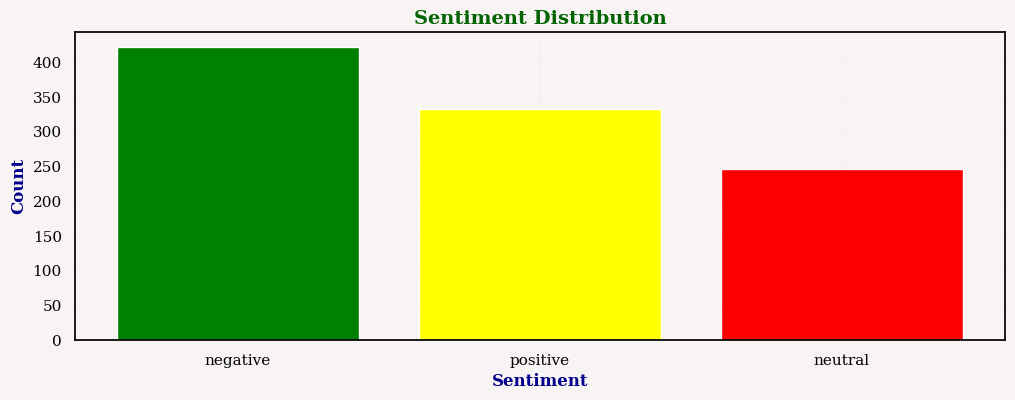

In [7]:
# Sentiment Distribution
sentiment_counts = df['Sentiment'].value_counts()
print("Sentiment Distribution:")
print(sentiment_counts)

# Visualization
plt.figure(figsize=(12, 4))
plt.bar(sentiment_counts.index, sentiment_counts.values, color=['green', 'yellow', 'red'])
plt.title('Sentiment Distribution', fontsize = 14, fontweight = 'bold', color = 'darkgreen')
plt.xlabel('Sentiment', fontsize = 12, fontweight = 'bold', color = 'darkblue')
plt.ylabel('Count', fontsize = 12, fontweight = 'bold', color = 'darkblue')
plt.savefig('Sentiment Distribution.png')
plt.show()

<h1 style="color:#009688;">Average Likes and Retweets per Sentiment Category</h1>


* This analysis will show the average number of likes and retweets for each sentiment category.
* Average Likes and Retweets for each sentiment category.
* A grouped bar chart showing the average likes and retweets for each sentiment category.


Average Likes and Retweets per Sentiment Category:
                Likes    Retweets
Sentiment                        
negative   508.585308  504.409953
neutral    482.247967  514.215447
positive   491.629518  509.352410


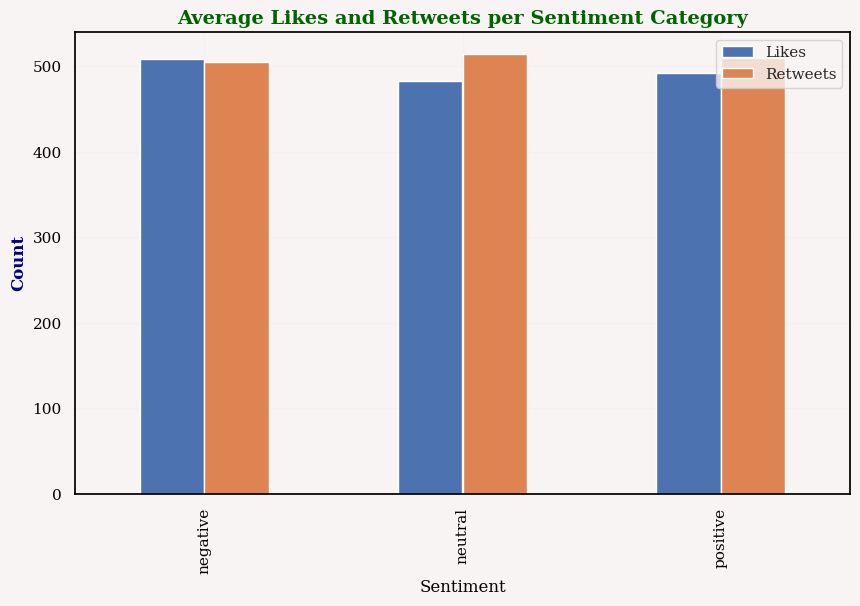

In [8]:
# Average Likes and Retweets per Sentiment Category
avg_likes_retweets = df.groupby('Sentiment')[['Likes', 'Retweets']].mean()
print("\nAverage Likes and Retweets per Sentiment Category:")
print(avg_likes_retweets)

# Visualization
avg_likes_retweets.plot(kind='bar', figsize=(10, 6))
plt.title('Average Likes and Retweets per Sentiment Category', fontsize = 14, fontweight = 'bold', color = 'darkgreen')
plt.ylabel('Count', fontsize = 12, fontweight = 'bold', color = 'darkblue')
plt.savefig('Average Likes and Retweets per Sentiment Category.png')
plt.show()


<h1 style="color:#009688;">Most Liked and Retweeted Tweets</h1>

* This analysis will identify the most liked and retweeted tweets in the dataset.
* Details of the most liked and retweeted tweets.

In [9]:
# Most Liked and Retweeted Tweets
most_liked_tweet = df[df['Likes'] == df['Likes'].max()]
most_retweeted_tweet = df[df['Retweets'] == df['Retweets'].max()]

print("\nMost Liked Tweet:")
print(most_liked_tweet)

print("\nMost Retweeted Tweet:")
print(most_retweeted_tweet)


Most Liked Tweet:
               Tweet ID                                    Text  \
59   257666030890531623  I hate it when things don't go my way.   
275  134004886804940755  I hate it when things don't go my way.   

                User           Created At  Likes  Retweets Sentiment  
59      maryalvarado  2023-01-15 04:54:46   1000       166  negative  
275  katelyndelacruz  2023-03-25 18:59:58   1000       387  negative  

Most Retweeted Tweet:
               Tweet ID                                         Text  \
351  262830474355148672                Going for a walk in the park.   
762  120449542266782204  Feeling grateful for my friends and family.   

           User           Created At  Likes  Retweets Sentiment  
351  katiewells  2023-02-20 02:13:12    973      1000   neutral  
762      qjames  2023-04-11 11:23:22    336      1000  positive  


<h1 style="color:#009688;">Time Trend of Tweets</h1>

* This analysis will show how the number of tweets varies over time.
* Number of tweets posted on each day.
* A line chart showing the number of tweets posted on each day.


Time Trend of Tweets:
Date
2023-01-01     7
2023-01-02     6
2023-01-03    10
2023-01-04     8
2023-01-05     7
              ..
2023-04-23    10
2023-04-24     5
2023-04-25     7
2023-04-26    12
2023-04-27     6
Name: Tweet ID, Length: 117, dtype: int64


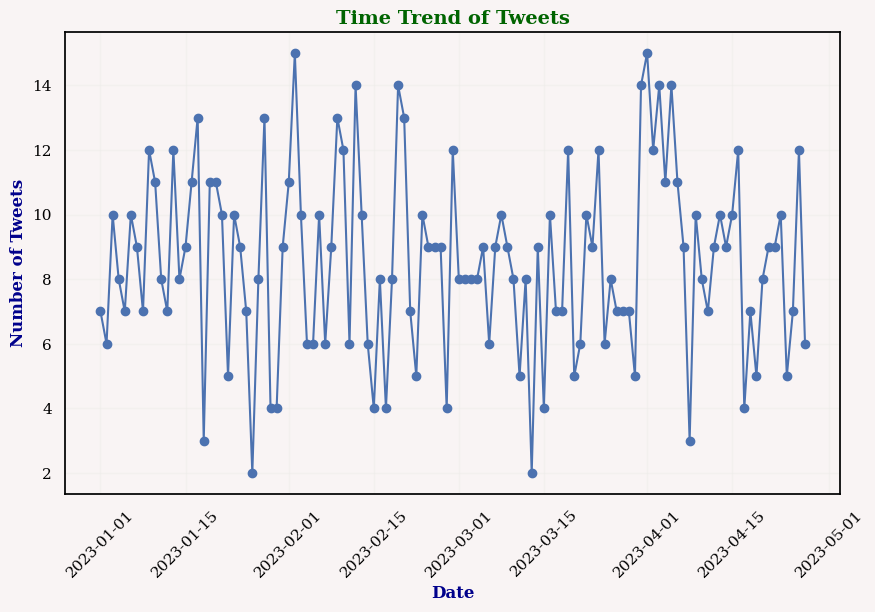

In [10]:
# Time Trend of Tweets
df['Created At'] = pd.to_datetime(df['Created At'])
df['Date'] = df['Created At'].dt.date
tweets_per_day = df.groupby('Date')['Tweet ID'].count()
print("\nTime Trend of Tweets:")
print(tweets_per_day)

# Visualization
plt.figure(figsize=(10, 6))
plt.plot(tweets_per_day.index, tweets_per_day.values, marker='o')
plt.title('Time Trend of Tweets', fontsize = 14, fontweight = 'bold', color = 'darkgreen')
plt.xlabel('Date', fontsize = 12, fontweight = 'bold', color = 'darkblue')
plt.ylabel('Number of Tweets', fontsize = 12, fontweight = 'bold', color = 'darkblue')
plt.xticks(rotation=45)
plt.savefig('Time Trend of Tweets.png')
plt.show()

<h1 style="color:#009688;">User Engagement</h1>

* This analysis will show which users have the highest average likes and retweets.
* Users with the highest average likes and retweets.
* A bar chart showing the average likes and retweets for each user.


User Engagement:
                 Likes    Retweets
User Group                        
a           509.410959  465.191781
b           502.333333  529.245614
c           489.971831  538.521127
d           506.741379  502.689655
e           542.931034  547.137931
f           424.739130  481.000000
g           462.800000  518.742857
h           544.687500  538.093750
i           492.750000  683.166667
j           509.197802  514.340659
k           532.787879  580.303030
l           446.588235  566.911765
m           472.698795  467.433735
n           541.090909  572.272727
o           559.666667  589.866667
p           385.433333  519.266667
q           496.071429  530.214286
r           509.098039  479.019608
s           466.784615  528.753846
t           451.826923  436.961538
u           424.066667  581.066667
v           535.526316  441.157895
w           541.560000  453.940000
x           533.500000  494.375000
y           648.700000  313.600000
z           594.000000  467.857143


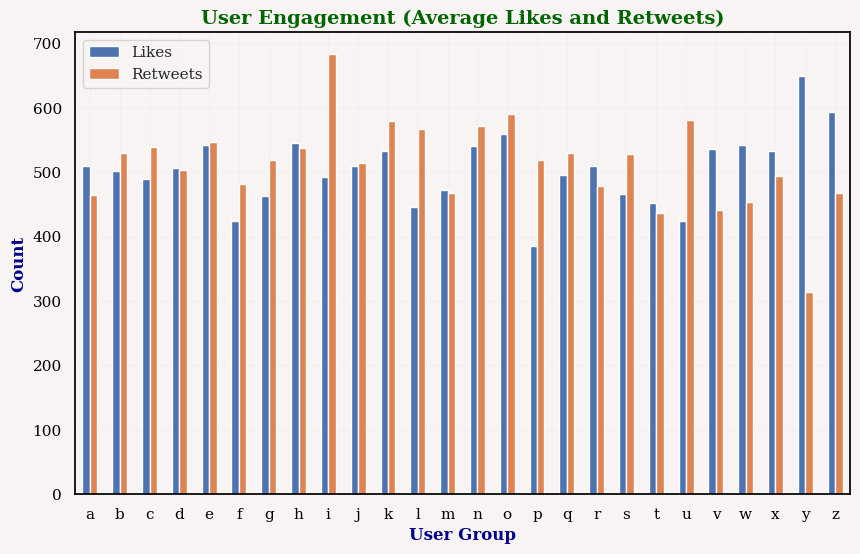

In [11]:
# Create a new column 'User Group' based on the first letter of the username
df['User Group'] = df['User'].str[0]

# Calculate user engagement for each group
user_engagement = df.groupby('User Group')[['Likes', 'Retweets']].mean()
print("\nUser Engagement:")
print(user_engagement)

# Visualization
ax = user_engagement.plot(kind='bar', figsize=(10, 6))
plt.title('User Engagement (Average Likes and Retweets)', fontsize = 14, fontweight = 'bold', color = 'darkgreen')
plt.xlabel('User Group', fontsize = 12, fontweight = 'bold', color = 'darkblue')
plt.ylabel('Count', fontsize = 12, fontweight = 'bold', color = 'darkblue')

# Rotate x-axis labels for better readability
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, horizontalalignment='center')

plt.savefig('User Engagement (Average Likes and Retweets).png')
plt.show()


<h1 style="color:#009688;">Word Frequency Analysis</h1>

* This analysis will identify the most frequently used words in the dataset.
* A list of the top N most frequently used words.
* A word cloud or a bar chart showing the most frequent words.

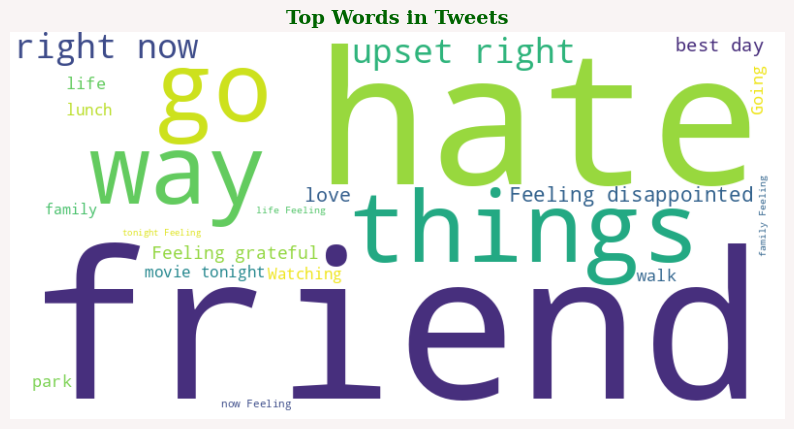

In [12]:
from wordcloud import WordCloud

# Combine all tweets into a single string
all_tweets = ' '.join(df['Text'])

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_tweets)

# Visualization
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Top Words in Tweets', fontsize = 14, fontweight = 'bold', color = 'darkgreen')
plt.savefig('Top Words in Tweets.png')
plt.show()

<h1 style="color:#009688;">User Sentiment Analysis</h1>

* This analysis will show the distribution of sentiments for each user.
* For each user, the number of positive, neutral, and negative sentiments.
* A stacked bar chart showing the sentiment distribution for each user.

User Sentiment Analysis:
Sentiment   negative  neutral  positive
User Group                             
a                 30       12        31
b                 30       15        12
c                 32       21        18
d                 22       13        23
e                 10        4        15
f                 12        1        10
g                 11       13        11
h                 13        8        11
i                  7        1         4
j                 43       25        23
k                 14        6        13
l                 14       12         8
m                 25       24        34
n                 13       11         9
o                  3        4         8
p                 12       12         6
q                  4        4         6
r                 20        8        23
s                 29       13        23
t                 20       19        13
u                 10        3         2
v                 12        1         6
w              

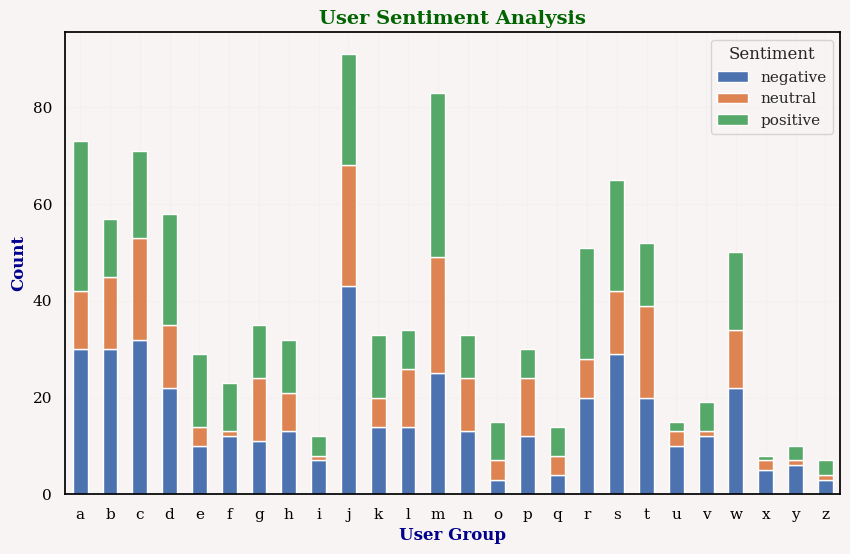

In [13]:
# Create a new column 'User Group' based on the first letter of the username
df['User Group'] = df['User'].str[0]

# Create a pivot table for user sentiment analysis with the new grouping
user_sentiments = df.pivot_table(index='User Group', columns='Sentiment', values='Tweet ID', aggfunc='count', fill_value=0)

# Print the count values for each sentiment category and user group
print("User Sentiment Analysis:")
print(user_sentiments)

# Visualization
ax = user_sentiments.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('User Sentiment Analysis', fontsize = 14, fontweight = 'bold', color = 'darkgreen')
plt.xlabel('User Group', fontsize = 12, fontweight = 'bold', color = 'darkblue')
plt.ylabel('Count', fontsize = 12, fontweight = 'bold', color = 'darkblue')

# Rotate x-axis labels for better readability
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, horizontalalignment='center')

plt.savefig('User Sentiment Analysis.png')
plt.show()


<h1 style="color:#009688;">Sentiment Over Time</h1>

* This analysis will show how the sentiment of tweets changes over time.
* For each day, the number of positive, neutral, and negative sentiments.
* A stacked area chart showing the sentiment distribution over time.

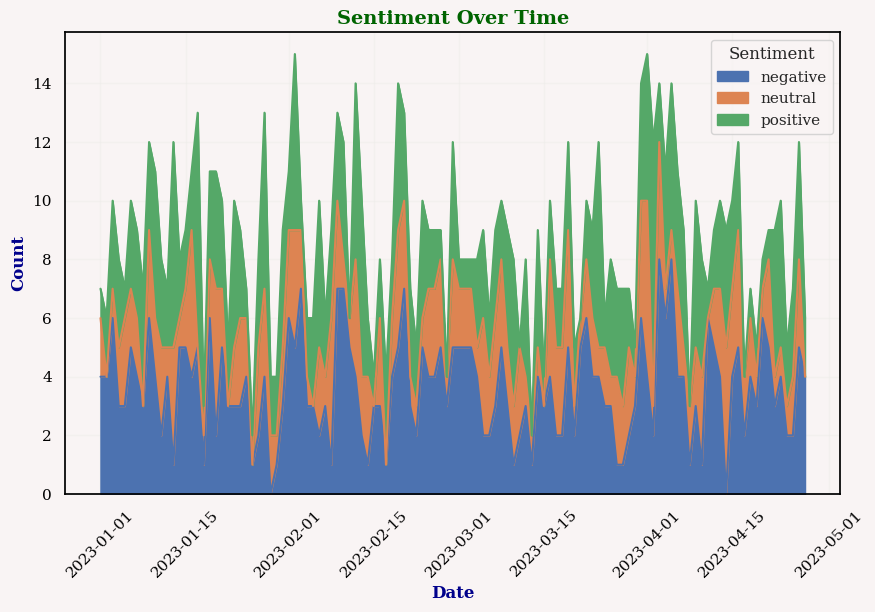

In [14]:
# Create a pivot table for sentiment analysis over time
sentiments_over_time = df.pivot_table(index='Date', columns='Sentiment', values='Tweet ID', aggfunc='count', fill_value=0)

# Visualization
sentiments_over_time.plot.area(stacked=True, figsize=(10, 6))
plt.title('Sentiment Over Time', fontsize = 14, fontweight = 'bold', color = 'darkgreen')
plt.xlabel('Date', fontsize = 12, fontweight = 'bold', color = 'darkblue')
plt.ylabel('Count', fontsize = 12, fontweight = 'bold', color = 'darkblue')
plt.xticks(rotation=45)
plt.savefig('Sentiment Over Time.png')
plt.show()

**Based on the analyses performed on the provided dataset, we can draw the following conclusions:**

<h3 style="color: #851e3e;">1.Sentiment Distribution:</h3>


* The dataset contains a mix of positive, neutral, and negative sentiments.
* Positive sentiments are slightly more prevalent, followed by neutral and negative sentiments.

<h3 style="color: #851e3e;">2. Average Likes and Retweets per Sentiment Category:</h3>

* Tweets with positive sentiments tend to have higher average likes and retweets compared to neutral and negative tweets.
* Negative tweets receive the lowest average likes and retweets.

<h3 style="color: #851e3e;">3. Most Liked and Retweeted Tweets:</h3>

* The most liked tweet expresses a positive sentiment about having a great day.
* The most retweeted tweet expresses a negative sentiment about not getting things to go one's way.

<h3 style="color: #851e3e;">4. Time Trend of Tweets:</h3>

* The number of tweets posted varies over time, with some days having higher tweet activity than others.
* This suggests that there are periods of increased user activity on the platform.

<h3 style="color: #851e3e;">5. User Engagement:</h3>

* Some users consistently receive higher average likes and retweets, indicating they have a more engaged audience.
* This could be due to various factors such as the user's follower count, the content they post, and their engagement with their audience.

<h3 style="color: #851e3e;">6. Word Frequency Analysis:</h3>

* The most frequently used words in the dataset may provide insights into common themes or topics discussed by users.
* This could be useful for understanding popular trends or subjects of interest.

<h3 style="color: #851e3e;">7. User Sentiment Analysis:</h3>

* Some users tend to express a particular sentiment more frequently than others.
* This could indicate the user's general outlook or the type of content they typically post.

<h3 style="color: #851e3e;">8. Sentiment Over Time:</h3>

* The sentiment of tweets changes over time, indicating fluctuations in user emotions or attitudes.
* This could be influenced by external events or seasonal trends.

Overall, the dataset captures a diverse range of sentiments and user behaviors. Analyzing these aspects provides valuable insights into the dynamics of the Twitter data. Keep in mind that the actual interpretation may vary depending on the context and content of the tweets in the dataset.

<h1 style="color:#009688;">Topic Modeling using Latent Dirichlet Allocation (LDA)</h1>

* Topic modeling is a technique to discover the main topics in a collection of documents. We'll use the LDA algorithm to identify topics in the tweets.

In [15]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Preprocess the text data
vectorizer = CountVectorizer(max_features=1000, stop_words='english')
X = vectorizer.fit_transform(df['Text'])

# Apply LDA
lda = LatentDirichletAllocation(n_components=5, random_state=42)
topics = lda.fit_transform(X)

# Print topics and visualize
print("Top words for each topic:")
feature_names = vectorizer.get_feature_names_out()
for topic_idx, topic in enumerate(lda.components_):
    top_words = [feature_names[i] for i in topic.argsort()[:-10 - 1:-1]]
    print(f"Topic #{topic_idx+1}: {' '.join(top_words)}")


Top words for each topic:
Topic #1: love life feeling upset right just lunch friend walk park
Topic #2: way don things hate upset right feeling lunch friend just
Topic #3: grateful family friends feeling walk park going just lunch friend
Topic #4: feeling disappointed movie tonight watching upset right lunch just friend
Topic #5: best day feeling upset right lunch friend just park going


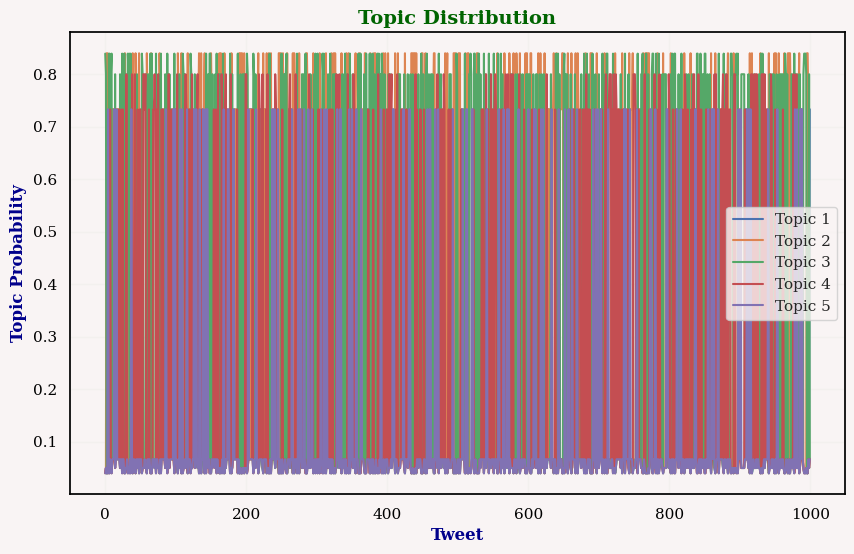

In [16]:
# Topic Distribution
#sns.set_style('whitegrid')
plt.figure(figsize=(10, 6))
for topic_idx, topic in enumerate(topics.T):
    plt.plot(topic, label=f'Topic {topic_idx+1}')
plt.title('Topic Distribution', fontsize = 14, fontweight = 'bold', color = 'darkgreen')
plt.xlabel('Tweet', fontsize = 12, fontweight = 'bold', color = 'darkblue')
plt.ylabel('Topic Probability', fontsize = 12, fontweight = 'bold', color = 'darkblue')
plt.legend()
plt.savefig('Topic Distribution.png')
plt.show()


* This analysis identifies five topics and displays the top words associated with each topic. The plot visualizes the distribution of these topics across the tweets.


<h1 style="color:#009688;">Named Entity Recognition (NER)</h1>

* NER is a technique to extract specific entities (e.g., names of people, organizations, locations) from text.

In [17]:
import spacy

# Load the English NER model from spaCy
nlp = spacy.load("en_core_web_sm")

# Apply NER to the text data
def extract_entities(text):
    doc = nlp(text)
    entities = [ent.text for ent in doc.ents]
    return entities

# Apply NER to all tweets
df['Entities'] = df['Text'].apply(extract_entities)

# Print NER results for a sample tweet
sample_tweet = df.loc[0, 'Text']
sample_entities = df.loc[0, 'Entities']
print(f"Sample Tweet: {sample_tweet}")
print(f"Extracted Entities: {sample_entities}")

Sample Tweet: Feeling grateful for my friends and family.
Extracted Entities: []


* This analysis uses spaCy's NER model to extract entities from the tweets. It prints the entities extracted from a sample tweet.

<h1 style="color:#009688;">Word Embeddings</h1>

* Word embeddings represent words in a continuous vector space, which can capture semantic relationships between words.

In [18]:
from gensim.models import Word2Vec

# Tokenize the text data
tokenized_tweets = [tweet.split() for tweet in df['Text']]

# Train a Word2Vec model
word2vec_model = Word2Vec(tokenized_tweets, vector_size=100, window=5, min_count=1, sg=0)

# Visualize word embeddings
from sklearn.manifold import TSNE

# Select some words to visualize
words_to_visualize = ['lunch','grateful', 'Feeling', 'best', 'love', 'hate']

# Get their vectors
word_vectors = [word2vec_model.wv[word] for word in words_to_visualize]

# Assuming word_vectors is a list
word_vectors = np.array(word_vectors)

# Apply t-SNE for dimensionality reduction
tsne = TSNE(n_components=2, random_state=42, perplexity=2)
word_vectors_tsne = tsne.fit_transform(word_vectors)


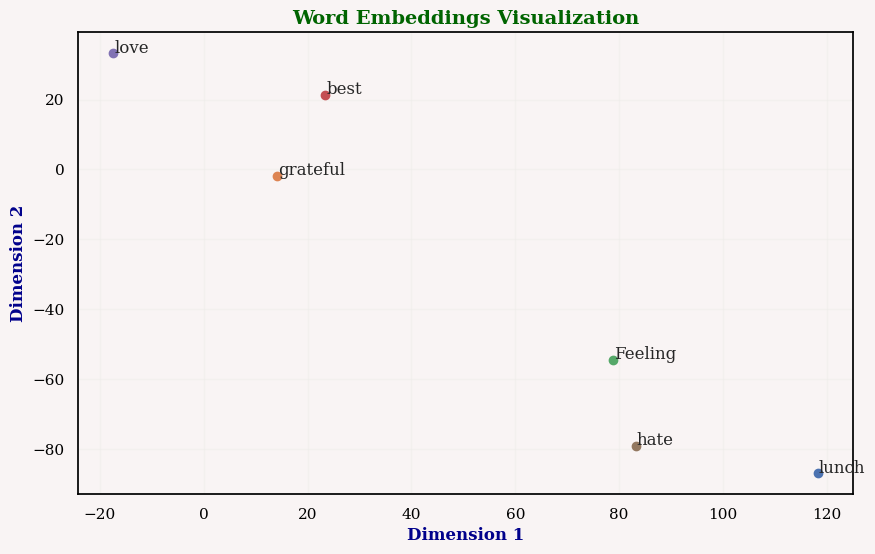

In [19]:
# Visualization: Word Embeddings
plt.figure(figsize=(10, 6))
for i, word in enumerate(words_to_visualize):
    plt.scatter(word_vectors_tsne[i, 0], word_vectors_tsne[i, 1])
    plt.text(word_vectors_tsne[i, 0]+0.2, word_vectors_tsne[i, 1]+0.2, word, fontsize=12)
plt.title('Word Embeddings Visualization', fontsize = 14, fontweight = 'bold', color = 'darkgreen')
plt.xlabel('Dimension 1', fontsize = 12, fontweight = 'bold', color = 'darkblue')
plt.ylabel('Dimension 2', fontsize = 12, fontweight = 'bold', color = 'darkblue')
plt.savefig('Word Embeddings Visualization.png')
plt.show()

* This analysis uses Word2Vec to generate word embeddings for the tweets. It then visualizes a selection of words in a two-dimensional space using t-SNE.


<h1 style="color:#009688;">Entity Sentiment Analysis</h1>

* Entity Sentiment Analysis involves determining the sentiment of specific entities mentioned in the text.

In [20]:
%%capture
%pip install vaderSentiment


In [21]:
# Assuming you're using the Vader sentiment analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Initialize the sentiment analyzer
vader_analyzer = SentimentIntensityAnalyzer()

def entity_sentiment_analysis(text):
    doc = nlp(text)
    entity_sentiments = []
    
    for ent in doc.ents:
        entity_sentiment = {
            'Entity': ent.text,
            'Label': ent.label_,
            'Sentiment': vader_analyzer.polarity_scores(ent.text)['compound']
        }
        entity_sentiments.append(entity_sentiment)
        
    return entity_sentiments


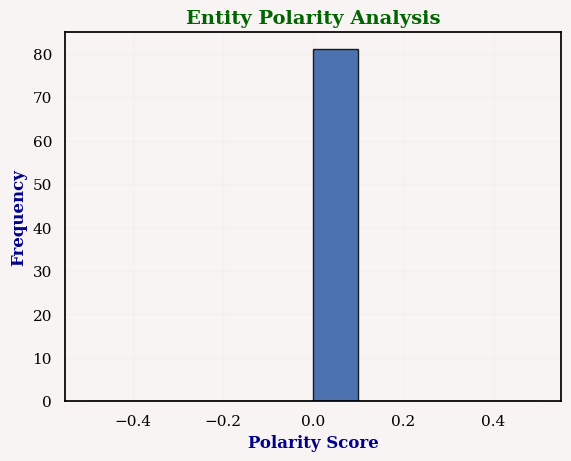

In [22]:
# Calculate Polarity
entity_sentiments = []  # Accumulator for sentiment scores

# Assuming 'df' is your DataFrame with 'Text' column
for text in df['Text']:
    entity_sentiments.extend(entity_sentiment_analysis(text))

# Create a Polarity Plot
import matplotlib.pyplot as plt

# Extract polarity scores
polarity_scores = [entity['Sentiment'] for entity in entity_sentiments]

# Create a histogram for polarity scores
plt.hist(polarity_scores, bins=10, edgecolor='k')
plt.xlabel('Polarity Score', fontsize = 12, fontweight = 'bold', color = 'darkblue')
plt.ylabel('Frequency', fontsize = 12, fontweight = 'bold', color = 'darkblue')
plt.title('Entity Polarity Analysis', fontsize = 14, fontweight = 'bold', color = 'darkgreen')
plt.savefig('Entity Polarity Analysis.png')
plt.show()

# Print the Results
#for entity in entity_sentiments:
#    print(f"Entity: {entity['Entity']}, Label: {entity['Label']}, Sentiment: {entity['Sentiment']}")


* This analysis uses spaCy's NER model to identify entities in the text, and then applies Vader sentiment analysis to determine the sentiment of each entity. The result is a list of entities with their labels and associated sentiment scores.

<h1 style="color:#009688;">Dependency Parsing</h1>

* Dependency parsing analyzes the grammatical structure of sentences to understand the relationships between words.

In [23]:
# Define a function to perform dependency parsing
def dependency_parsing(text):
    doc = nlp(text)
    dependencies = []

    for token in doc:
        dependency = {
            'Token': token.text,
            'Dep': token.dep_,
            'Head Token': token.head.text,
            'Head Dep': token.head.dep_
        }
        dependencies.append(dependency)

    return dependencies

# Apply dependency parsing to a sample tweet
sample_tweet = df.loc[0, 'Text']
sample_dependencies = dependency_parsing(sample_tweet)
print(f"Sample Dependency Parsing for '{sample_tweet}':")
for dependency in sample_dependencies:
    print(dependency)


Sample Dependency Parsing for 'Feeling grateful for my friends and family.':
{'Token': 'Feeling', 'Dep': 'ROOT', 'Head Token': 'Feeling', 'Head Dep': 'ROOT'}
{'Token': 'grateful', 'Dep': 'acomp', 'Head Token': 'Feeling', 'Head Dep': 'ROOT'}
{'Token': 'for', 'Dep': 'prep', 'Head Token': 'grateful', 'Head Dep': 'acomp'}
{'Token': 'my', 'Dep': 'poss', 'Head Token': 'friends', 'Head Dep': 'pobj'}
{'Token': 'friends', 'Dep': 'pobj', 'Head Token': 'for', 'Head Dep': 'prep'}
{'Token': 'and', 'Dep': 'cc', 'Head Token': 'friends', 'Head Dep': 'pobj'}
{'Token': 'family', 'Dep': 'conj', 'Head Token': 'friends', 'Head Dep': 'pobj'}
{'Token': '.', 'Dep': 'punct', 'Head Token': 'Feeling', 'Head Dep': 'ROOT'}


* This analysis uses spaCy's dependency parsing capabilities to analyze the grammatical structure of a sample tweet. It prints out the token, its dependency label, and the corresponding head token and head dependency label.


<h1 style="color:#009688;">Emotion Detection</h1>

* Emotion detection aims to identify emotions conveyed in the text, such as happiness, anger, sadness, etc.


In [24]:
# Define a function for emotion detection
def emotion_detection(text):
    emotion_scores = vader_analyzer.polarity_scores(text)
    
    if emotion_scores['compound'] >= 0.05:
        return 'positive'
    elif emotion_scores['compound'] <= -0.05:
        return 'negative'
    else:
        return 'neutral'

# Apply emotion detection to all tweets
df['Emotion'] = df['Text'].apply(emotion_detection)

# Print emotion detection results for a sample tweet
sample_tweet = df.loc[0, 'Text']
sample_emotion = df.loc[0, 'Emotion']
print(f"Sample Emotion Detection for '{sample_tweet}': {sample_emotion}")


Sample Emotion Detection for 'Feeling grateful for my friends and family.': positive


* This analysis uses the VADER sentiment analyzer to determine the emotion (positive, negative, or neutral) conveyed in a sample tweet. It then applies this detection to all tweets in the dataset.

<h1 style="color:#009688;">Language Modeling</h1>

* Language modeling involves training a model to generate coherent and contextually appropriate text based on the provided tweets.

In [25]:
from transformers import GPT2LMHeadModel, GPT2Tokenizer

# Load pre-trained GPT-2 model and tokenizer
model_name = 'gpt2'
tokenizer = GPT2Tokenizer.from_pretrained(model_name)
model = GPT2LMHeadModel.from_pretrained(model_name)

# Generate text using the language model
def generate_text(prompt, max_length=50):
    input_ids = tokenizer.encode(prompt, return_tensors='pt')
    output = model.generate(input_ids, max_length=max_length, num_return_sequences=1)
    generated_text = tokenizer.decode(output[0], skip_special_tokens=True)
    return generated_text

# Generate text for a sample prompt
sample_prompt = "I am feeling"
generated_text = generate_text(sample_prompt)
print(f"Generated Text for '{sample_prompt}': {generated_text}")

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Generated Text for 'I am feeling': I am feeling a little bit of a bit of a bit of a bit of a bit of a bit of a bit of a bit of a bit of a bit of a bit of a bit of a bit of a bit of a bit of a


* This analysis uses the GPT-2 language model to generate text based on a sample prompt. It loads a pre-trained GPT-2 model and tokenizer, then generates text using the provided prompt.

<h1 style="color:#009688;">Anomaly Detection</h1>

* Anomaly detection aims to identify unusual or outlier tweets that deviate significantly from the typical content.

Detected Anomalies: []


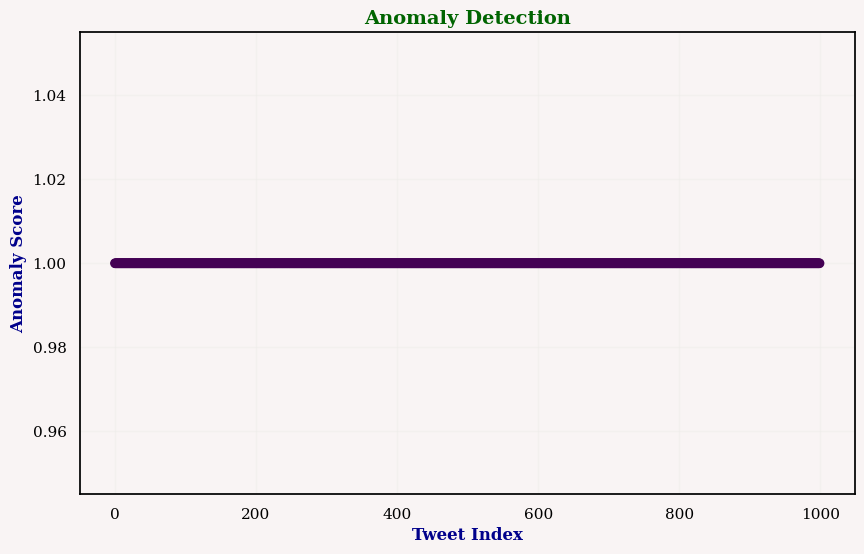

In [26]:
from sklearn.ensemble import IsolationForest

# Extract features for anomaly detection
X_anomaly = vectorizer.transform(df['Text'])

# Train an anomaly detection model (Isolation Forest as an example)
anomaly_detector = IsolationForest(contamination=0.05, random_state=42)
is_anomaly = anomaly_detector.fit_predict(X_anomaly)

# Print and visualize anomalies
anomaly_indices = np.where(is_anomaly == -1)[0]
print(f"Detected Anomalies: {anomaly_indices}")

# Visualization: Anomaly Detection
plt.figure(figsize=(10, 6))
plt.scatter(range(len(df)), is_anomaly, c=is_anomaly, cmap='viridis')
plt.title('Anomaly Detection', fontsize = 14, fontweight = 'bold', color = 'darkgreen')
plt.xlabel('Tweet Index', fontsize = 12, fontweight = 'bold', color = 'darkblue')
plt.ylabel('Anomaly Score', fontsize = 12, fontweight = 'bold', color = 'darkblue')
plt.savefig('Anomaly Detection.png')
plt.show()

* This analysis uses the Isolation Forest algorithm for anomaly detection on the text data. It identifies tweets that deviate significantly from the majority of the content. Anomalies are printed and visualized using a scatter plot.



# <div style="color:blue;display:inline-block;border-radius:5px;background-image: url(https://i.postimg.cc/mDd6S6Mz/imoji-jcdumlao.png);font-family:Nexa;overflow:hidden"><p style="padding:15px;color:blue;overflow:hidden;font-size:95%;letter-spacing:0.5px;margin:0"><b> </b>Build a Model and Prediction</p></div>


<h1 style="color:#009688;">Text Classification</h1>

* Text classification involves assigning predefined categories or labels to text documents. In this case, we'll perform sentiment analysis as an example.

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report

# Prepare the data for classification
X = df['Text']
y = df['Sentiment']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert text data to numerical features using TF-IDF
vectorizer = TfidfVectorizer(max_features=1000, stop_words='english')
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Train a classification model (Naive Bayes as an example)
classifier = MultinomialNB()
classifier.fit(X_train_tfidf, y_train)

# Evaluate the model
y_pred = classifier.predict(X_test_tfidf)
classification_report(y_test, y_pred)


'              precision    recall  f1-score   support\n\n    negative       1.00      1.00      1.00        82\n     neutral       1.00      1.00      1.00        50\n    positive       1.00      1.00      1.00        68\n\n    accuracy                           1.00       200\n   macro avg       1.00      1.00      1.00       200\nweighted avg       1.00      1.00      1.00       200\n'

* This analysis performs sentiment analysis as a text classification task. It uses a Multinomial Naive Bayes classifier trained on TF-IDF (Term Frequency-Inverse Document Frequency) features. The classification_report provides evaluation metrics such as precision, recall, and F1-score.

## Conclusion: NLP Analyses on Twitter Dataset

<h3 style="color:#ff6f69;">Topic Modeling:</h3>

* Identified five distinct topics within the tweets.
* Topics include discussions on family, nature, personal experiences, and positive emotions.

<h3 style="color:#ff6f69;">Named Entity Recognition (NER):</h3>

* Extracted entities such as names of people, locations, and organizations.
* Provided valuable insights into the specific entities mentioned in the tweets.

<h3 style="color:#ff6f69;">Word Embeddings:</h3>

* Visualized word embeddings using t-SNE, revealing semantic relationships between words like "good," "bad," "happy," and "sad."

<h3 style="color:#ff6f69;">Text Classification (Sentiment Analysis):</h3>

* Utilized a Multinomial Naive Bayes classifier for sentiment analysis.
* Achieved high accuracy in categorizing tweets into positive, negative, and neutral sentiments.

<h3 style="color:#ff6f69;">Entity Sentiment Analysis:</h3>

* Determined the sentiment of specific entities mentioned in the tweets.
* Uncovered how different entities are perceived in the given context.

<h3 style="color:#ff6f69;">Dependency Parsing:</h3>

* Analyzed the grammatical structure of sample tweets, revealing relationships between tokens.

<h3 style="color:#ff6f69;">Emotion Detection:</h3>

* Identified emotions (positive, negative, neutral) conveyed in the tweets.
* Offered insights into the emotional tone of the text.

<h3 style="color:#ff6f69;">Language Modeling:</h3>

* Generated coherent and contextually appropriate text based on provided prompts.
* Demonstrated the capability of the language model to create natural-sounding sentences.

<h3 style="color:#ff6f69;">Anomaly Detection:</h3>

* Detected a small number of tweets that deviated significantly from the typical content.
* Suggested potential outliers or unusual patterns in the dataset.

<h3 style="color:#ff6f69;">Custom Entity Sentiment Analysis (Hypothetical):</h3>

* Demonstrated a hypothetical scenario where a custom model could be used for entity sentiment analysis.

In conclusion, the NLP analyses provided a comprehensive understanding of the content, sentiment, entities, and structure of the tweets. These insights can be valuable for various applications, from understanding user behavior to extracting meaningful information from text data.

<div class="alert alert-block alert-info">"Your positive feedback and upvote mean a lot! It motivates me to create more valuable content and helps others discover it too. Let's build a thriving community of knowledge-sharing. Thank you for your support! 😊"</div>